In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


%matplotlib inline

2023-12-20 08:08:19.459274: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Training xception model

In [2]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './Data_for_capstone1/data/train',
    target_size=(150, 150),
    batch_size=32
)

Found 5771 images belonging to 2 classes.


In [3]:
X, y = next(train_ds)

In [4]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './Data_for_capstone1/data/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 1905 images belonging to 2 classes.


In [6]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

In [7]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2023-12-20 08:09:07.942246: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-20 08:09:08.610372: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-20 08:09:08.610889: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-20 08:09:08.610923: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-20 08:09:08.611564: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-20 08:09:08.611641: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


181/181 [==============================] - 25s 113ms/step - loss: 0.6065 - accuracy: 0.7900 - val_loss: 0.5075 - val_accuracy: 0.8079
Epoch 2/10
181/181 [==============================] - 15s 81ms/step - loss: 0.4385 - accuracy: 0.8395 - val_loss: 0.5156 - val_accuracy: 0.8168
Epoch 3/10
181/181 [==============================] - 15s 80ms/step - loss: 0.3807 - accuracy: 0.8567 - val_loss: 0.6848 - val_accuracy: 0.7869
Epoch 4/10
181/181 [==============================] - 15s 82ms/step - loss: 0.3253 - accuracy: 0.8674 - val_loss: 0.5353 - val_accuracy: 0.8110
Epoch 5/10
181/181 [==============================] - 15s 81ms/step - loss: 0.3212 - accuracy: 0.8749 - val_loss: 0.7777 - val_accuracy: 0.7874
Epoch 6/10
181/181 [==============================] - 15s 81ms/step - loss: 0.3151 - accuracy: 0.8825 - val_loss: 0.5915 - val_accuracy: 0.8231
Epoch 7/10
181/181 [==============================] - 15s 82ms/step - loss: 0.2761 - accuracy: 0.8915 - val_loss: 0.6254 - val_accuracy: 0.8215
Ep

In [24]:
def make_model(learning_rate,size_inner,droprate):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(2)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [19]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr,size_inner=0,droprate=0)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
181/181 [==============================] - 18s 85ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6931 - val_accuracy: 0.5197
Epoch 2/10
181/181 [==============================] - 15s 81ms/step - loss: 0.6931 - accuracy: 0.5101 - val_loss: 0.6930 - val_accuracy: 0.5197
Epoch 3/10
181/181 [==============================] - 14s 80ms/step - loss: 0.6931 - accuracy: 0.5101 - val_loss: 0.6930 - val_accuracy: 0.5197
Epoch 4/10
181/181 [==============================] - 15s 81ms/step - loss: 0.6931 - accuracy: 0.5101 - val_loss: 0.6929 - val_accuracy: 0.5197
Epoch 5/10
181/181 [==============================] - 15s 80ms/step - loss: 0.6930 - accuracy: 0.5101 - val_loss: 0.6929 - val_accuracy: 0.5197
Epoch 6/10
181/181 [==============================] - 15s 80ms/step - loss: 0.6930 - accuracy: 0.5101 - val_loss: 0.6928 - val_accuracy: 0.5197
Epoch 7/10
181/181 [==============================] - 15s 81ms/step - loss: 0.6930 - accuracy: 0.5101 - val_loss: 0.6928 - val_ac

KeyboardInterrupt: 

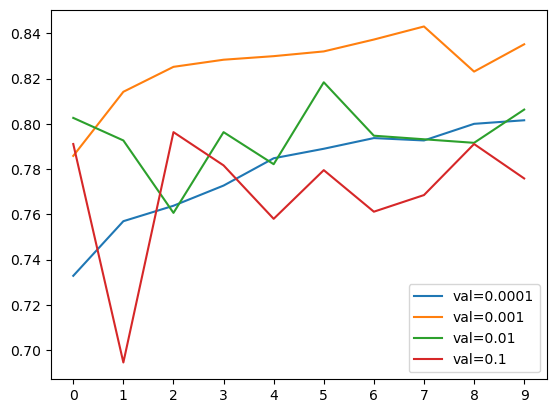

In [16]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size,drop)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

In [22]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size,droprate = 0)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
181/181 [==============================] - 18s 84ms/step - loss: 0.4478 - accuracy: 0.7959 - val_loss: 0.4584 - val_accuracy: 0.7801
Epoch 2/10
181/181 [==============================] - 14s 79ms/step - loss: 0.3630 - accuracy: 0.8392 - val_loss: 0.4111 - val_accuracy: 0.8105
Epoch 3/10
181/181 [==============================] - 15s 81ms/step - loss: 0.3365 - accuracy: 0.8539 - val_loss: 0.4216 - val_accuracy: 0.8210
Epoch 4/10
181/181 [==============================] - 14s 79ms/step - loss: 0.3120 - accuracy: 0.8661 - val_loss: 0.3721 - val_accuracy: 0.8399
Epoch 5/10
181/181 [==============================] - 15s 81ms/step - loss: 0.2844 - accuracy: 0.8775 - val_loss: 0.3782 - val_accuracy: 0.8357
Epoch 6/10
181/181 [==============================] - 14s 79ms/step - loss: 0.2612 - accuracy: 0.8882 - val_loss: 0.3991 - val_accuracy: 0.8252
Epoch 7/10
181/181 [==============================] - 15s 80ms/step - loss: 0.2463 - accuracy: 0.8964 - val_loss: 0.4116 - val_accura

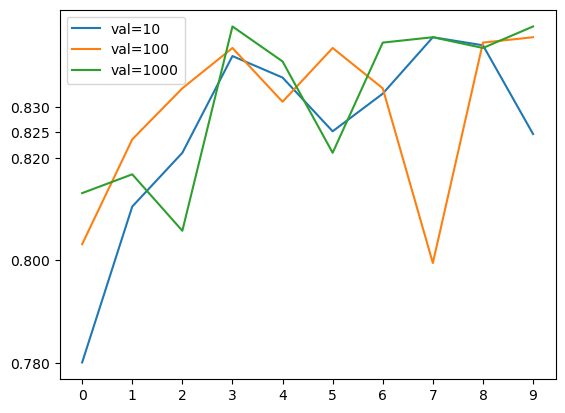

In [23]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

In [25]:
learning_rate = 0.001
size = 1000

scores = {}

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds,
                   callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
181/181 [==============================] - 19s 87ms/step - loss: 0.4480 - accuracy: 0.8000 - val_loss: 0.4098 - val_accuracy: 0.8199
Epoch 2/30
181/181 [==============================] - 15s 82ms/step - loss: 0.3409 - accuracy: 0.8461 - val_loss: 0.3970 - val_accuracy: 0.8210
Epoch 3/30
181/181 [==============================] - 15s 82ms/step - loss: 0.2892 - accuracy: 0.8745 - val_loss: 0.3978 - val_accuracy: 0.8241
Epoch 4/30
181/181 [==============================] - 15s 82ms/step - loss: 0.2500 - accuracy: 0.8972 - val_loss: 0.3813 - val_accuracy: 0.8373
Epoch 5/30
181/181 [==============================] - 15s 82ms/step - loss: 0.2180 - accuracy: 0.9130 - val_loss: 0.3962 - val_accuracy: 0.8462
Epoch 6/30
181/181 [==============================] - 15s 80ms/step - loss: 0.1572 - accuracy: 0.9385 - val_loss: 0.4526 - val_accuracy: 0.8252
Epoch 7/30
181/181 [==============================] - 15s 80ms/step - loss: 0.1436 - accuracy: 0.9470 - val_loss: 0.4710 - val_accur

The best model is: learning_rate = 0.001, size = 1000, droprate = 0.5